In [1]:
import Intergration
import Exchange
import numpy as np
import os
import shutil
from IPython.display import clear_output

# Params for new image (larger)

In [10]:
# Load data
# localpath = "E:\Faurecia\Data"
workpath = r"D:\PFE_Xue\04-Mise_en_oeuvre_essais\99-Archive"
localpath = workpath + "\Image_Data_large"
abandon_dir = workpath + "\Abandon"
traite_dir = workpath + "\DEJA_traites"

# configuration
data_color_range = [60, 160, 160, 210, 130, 200]
start_ratio = 0.5
vert_ratio_num = 0.5
vert_ratio_gap=0.8

ransac_params = {"max_iter": 10000, "mean_iter":10, \
                 "line1_gap":50, "line1_cut_range":0.2, "line1_k_min":-1,  "line1_k_max":0.05,\
                 "line2_gap":5, "line2_cut_range":0.90, "line2_k_max":-10}

find_corner_params = {"color_range":[0, 100, 0, 100, 0, 100], \
                      "X_search_range":4, \
                      "y_search_range":4}

ocr_params = {"scale_w":2, "scale_h":2, "sharpen_lower":175, "sharpen_upper":255, \
              "kernel": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32) }

find_mark_params = {"SHOW_MARK":False, "thr": 170, "search_range":10, \
                    "bb_size_X":(12,1), "jug_cond_X":5, \
                    "bb_size_Y":(1,12), "jug_cond_Y":5}

find_coor_params = {"SHOW_COOR":False, "bias_w_x":-20, "bias_h_x":8, "img_w_x":40, "img_h_x":30, \
                    "bias_w_y":-50, "bias_h_y":-10, "img_w_y":45, "img_h_y":20, "ocr_params":ocr_params}

find_peak_params = {"SHOW_PEAK":False, \
                    "bias_w_l":5, "bias_w_r":-50, "bias_h":2, "img_w":30, "img_h":60, \
                    "x_thr":15, "y_thr":100, "color_range":[0,180,0,180,0,180],\
                    "ocr_params":ocr_params}

SHOW_RANSAC_LINE = True
CHECK_RESULT = True
MODE_CHECK = False
SHOW_RESULT = True

# Params for old images (smaller)

In [2]:
# Load data
# localpath = "E:\Faurecia\Data"
# localpath = "E:\Faurecia\Treatment_Data\Image_Data_small"
# abandon_dir = r"E:\Faurecia\Abandon\small"
# abandon_dir= r"E:\Faurecia\Data\SB_T85_V&Plate_LGF20"
workpath = r"D:\PFE_Xue\04-Mise_en_oeuvre_essais\99-Archive"
localpath = workpath + "\Image_Data_small"
# print (localpath)
abandon_dir = workpath + "\Abandon"
traite_dir = workpath + "\DEJA_traites"

# configuration
data_color_range = [60, 160, 160, 210, 130, 200]
start_ratio = 0.5
vert_ratio_num = 0.2
vert_ratio_gap=0.8

ransac_params = {"max_iter": 10000, "mean_iter":10, \
                 "line1_gap":50, "line1_cut_range":0.2, "line1_k_min":-1, "line1_k_max":0.05, \
                 "line2_gap":5, "line2_cut_range":0.90, "line2_k_max":-10}

find_corner_params = {"color_range":[0, 100, 0, 100, 0, 100], \
                      "X_search_range":4, \
                      "y_search_range":4}

ocr_params = {"scale_w":2, "scale_h":2, "sharpen_lower":160, "sharpen_upper":255, \
              "kernel": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32) }

find_mark_params = {"SHOW_MARK":False, "thr": 170, "search_range":10, \
                    "bb_size_X":(12,1), "jug_cond_X":5, \
                    "bb_size_Y":(1,12), "jug_cond_Y":5}

find_coor_params = {"SHOW_COOR":False, "bias_w_x":-20, "bias_h_x":8, "img_w_x":30, "img_h_x":14, \
                    "bias_w_y":-32, "bias_h_y":-7, "img_w_y":30, "img_h_y":14, "ocr_params":ocr_params}

find_peak_params = {"SHOW_PEAK":False, "scale_w":2, "scale_h":2, \
                    "bias_w_l":5, "bias_w_r":-50, "bias_h":2, "img_w":30, "img_h":30, \
                    "x_thr":12, "y_thr":50, "color_range":[0,180,0,180,0,180],\
                    "ocr_params":ocr_params}

SHOW_RANSAC_LINE = True
CHECK_RESULT = True
MODE_CHECK = False
SHOW_RESULT = True

# Loop Run

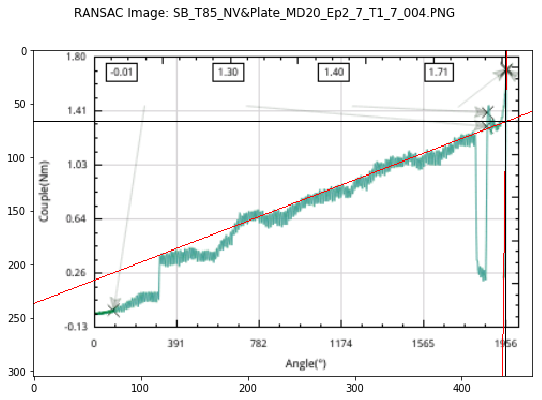

R: rerun, others: continue: 

X : ['0', '391.0'], Y: ['-0.132', ''], Peak Value: 1.71
OCR Check, if right, press Enter, if not, please enter its index and true value
Enter A to abandon direcly
OCR correction: 2 -.13 3 .26

X : ['0', '391.0'], Y: ['-0.13', '0.26'], Peak Value: 1.71
OCR Check, if right, press Enter, if not, please enter its index and true value
Enter A to abandon direcly
OCR correction: 
=============Resualt=============


The origin of coordinate is: (57, 259)
The firs marker in X axis is: (135, 259)
The second marker in y axis is: (57, 158)
The distance of every tick mark in X axis is 78 pixel
The distance of every tick mark in y axis is 50.5 pixel
The scale in x axis is: ['0', '391.0']
The scale in y axis is: ['-0.13', '0.26']
The x scale is 5.013/pixel
The y scale is 0.00772/pixel
Line 1 is: y = -0.385x + 237.874
Line 2 is: y = -86.250x + 38152.000
The first point is: (1927.711, 1.347)
The second point is: (1930.488, 1.71)


=============Finish=============
E: exit, 

In [6]:
peakvalue = Exchange.import_peak(workpath)
result_dir = loop_run(localpath, workpath, abandon_dir, traite_dir, peakvalue)